In [1]:
import torch as t
import torchvision as tv
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt

show = ToPILImage()

In [2]:
#定义对数据的预处理
transform = transforms.Compose([
    transforms.ToTensor(), #转为Tensor
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5)), #归一化
])

In [3]:
#训练集
trainset = tv.datasets.CIFAR100(
                    root='F:\\python_study\\cifar-100-python\\',
                    train = True,
                    download = True,
                    transform = transform)

trainloader = t.utils.data.DataLoader(
                    trainset,
                    batch_size=4,
                    shuffle=True,
                    num_workers=2)

Files already downloaded and verified


In [4]:
#测试集
testset = tv.datasets.CIFAR100(
                    'F:\\python_study\\cifar-100-python\\',
                    train = False,
                    download = True,
                    transform = transform)

testloader = t.utils.data.DataLoader(
                    testset,
                    batch_size = 4,
                    shuffle = False,
                    num_workers = 2)

Files already downloaded and verified


[tensor(52), tensor(88), tensor(57), tensor(30)]


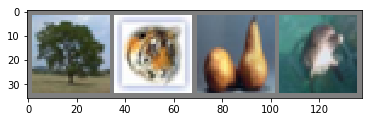

In [5]:
images, labels =next(iter(trainloader)) 
img = tv.utils.make_grid(images)
img = img.numpy().transpose(1,2,0)
std=[0.5,0.5,0.5]
mean=[0.5,0.5,0.5]
img=img*std+mean
print([labels[i] for i in range(4)])
plt.imshow(img)

 tensor(20)  tensor(41)  tensor(25)  tensor(73)


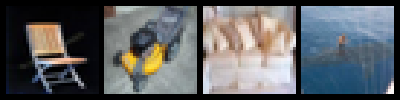

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next() #返回4张图片及标签
print(' '.join('%11s'%labels[j]for j in range(4)))
show(tv.utils.make_grid((images + 1)/2)).resize((400,100))

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 =  nn.Conv2d(3, 6, 5)
        self.conv2 =  nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 240)
        self.fc2 = nn.Linear(240, 120)
        self.fc3 = nn.Linear(120, 100)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=240, bias=True)
  (fc2): Linear(in_features=240, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=100, bias=True)
)


In [8]:
from torch import optim
criterion = nn.CrossEntropyLoss() #交叉损失函数
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [9]:
from torch.autograd import Variable
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #输入数据
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        #梯度清零
        optimizer.zero_grad()
        
        #forward + backward
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        
        #更新参数
        optimizer.step()
        
        #打印log信息
        running_loss += loss.data[0]
        if i % 2000 == 1999: #每2000个batch打印一次训练状态
            print('[%d, %5d] loss: %.3f' \
                 % (epoch + 1, i+1, running_loss /2000))
            running_loss = 0.0
        
print('Finished Training')

c:\users\darren\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,  2000] loss: 4.602
[1,  4000] loss: 4.386
[1,  6000] loss: 4.150
[1,  8000] loss: 4.010
[1, 10000] loss: 3.900
[1, 12000] loss: 3.828
[2,  2000] loss: 3.695
[2,  4000] loss: 3.632
[2,  6000] loss: 3.584
[2,  8000] loss: 3.522
[2, 10000] loss: 3.492
[2, 12000] loss: 3.445
[3,  2000] loss: 3.350
[3,  4000] loss: 3.304
[3,  6000] loss: 3.287
[3,  8000] loss: 3.271
[3, 10000] loss: 3.221
[3, 12000] loss: 3.232
[4,  2000] loss: 3.109
[4,  4000] loss: 3.106
[4,  6000] loss: 3.073
[4,  8000] loss: 3.050
[4, 10000] loss: 3.106
[4, 12000] loss: 3.056
[5,  2000] loss: 2.924
[5,  4000] loss: 2.922
[5,  6000] loss: 2.975
[5,  8000] loss: 2.955
[5, 10000] loss: 2.946
[5, 12000] loss: 2.909
[6,  2000] loss: 2.753
[6,  4000] loss: 2.805
[6,  6000] loss: 2.849
[6,  8000] loss: 2.854
[6, 10000] loss: 2.833
[6, 12000] loss: 2.881
[7,  2000] loss: 2.640
[7,  4000] loss: 2.692
[7,  6000] loss: 2.777
[7,  8000] loss: 2.798
[7, 10000] loss: 2.762
[7, 12000] loss: 2.774
[8,  2000] loss: 2.562
[8,  4000] 

[58,  4000] loss: 1.925
[58,  6000] loss: 1.958
[58,  8000] loss: 2.060
[58, 10000] loss: 2.076
[58, 12000] loss: 2.101
[59,  2000] loss: 1.762
[59,  4000] loss: 1.808
[59,  6000] loss: 1.954
[59,  8000] loss: 1.963
[59, 10000] loss: 2.068
[59, 12000] loss: 2.124
[60,  2000] loss: 1.725
[60,  4000] loss: 1.841
[60,  6000] loss: 1.987
[60,  8000] loss: 2.028
[60, 10000] loss: 2.018
[60, 12000] loss: 2.126
[61,  2000] loss: 1.780
[61,  4000] loss: 1.853
[61,  6000] loss: 1.960
[61,  8000] loss: 2.055
[61, 10000] loss: 2.092
[61, 12000] loss: 2.121
[62,  2000] loss: 1.706
[62,  4000] loss: 1.883
[62,  6000] loss: 1.973
[62,  8000] loss: 1.986
[62, 10000] loss: 2.056
[62, 12000] loss: 2.093
[63,  2000] loss: 1.836
[63,  4000] loss: 1.933
[63,  6000] loss: 1.951
[63,  8000] loss: 2.022
[63, 10000] loss: 2.047
[63, 12000] loss: 2.114
[64,  2000] loss: 1.745
[64,  4000] loss: 1.874
[64,  6000] loss: 1.951
[64,  8000] loss: 1.931
[64, 10000] loss: 2.075
[64, 12000] loss: 2.080
[65,  2000] loss

实际的label： tensor(49) tensor(33) tensor(72) tensor(51)


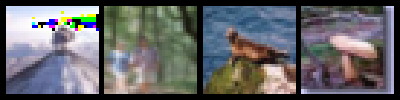

In [10]:
dataiter = iter(testloader)
images, labels = dataiter.next() # 一个batch返回4张图片
print('实际的label：', ' '.join(\
                            '%08s'%labels[j] for j in range(4)))
show(tv.utils.make_grid(images/2-0.5)).resize((400,100))

In [11]:
#计算图片在每个类别上的分数
outputs = net(Variable(images))
#得分最高的那个类
_, predicted = t.max(outputs.data, 1)

print('预测结果：', ' '.join('%5s'\
                       % predicted[j] for j in range(4)))

预测结果： tensor(15) tensor(51) tensor(55) tensor(91)


In [12]:
correct = 0 #预测正确的图片数
total = 0 #总共的图片数
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = t.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('测试集中的准确率为：%d %%'%(100*correct/total))

测试集中的准确率为：19 %
